Fluxo máximo: 16


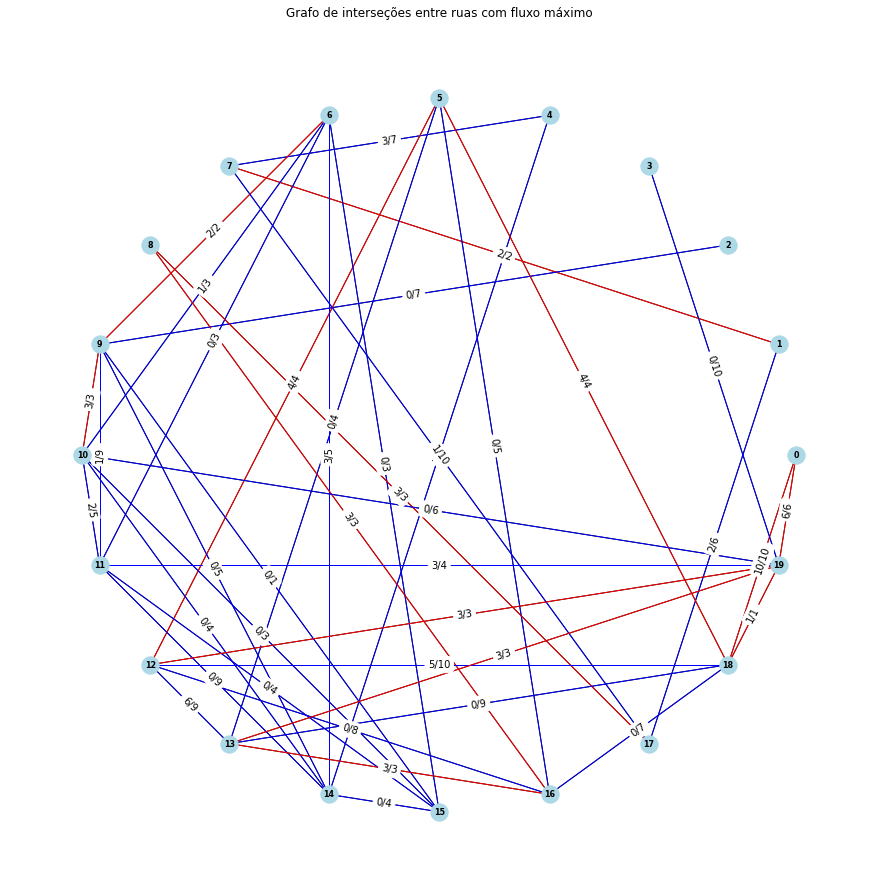

    source  target   flow
0        0      18  10/10
1        0      19    6/6
2        1       7    2/2
3        1      17    2/6
4        2       9    0/7
5        3      19   0/10
6        4       7    3/7
7        4      14    3/6
8        5      12    4/4
9        5      13    0/4
10       5      16    0/5
11       5      18    4/4
12       6       9    2/2
13       6      10    1/3
14       6      11    0/3
15       6      14    3/5
16       6      15    0/3
17       7      17   1/10
18       8      16    3/3
19       8      17    3/3
20       9      10    3/3
21       9      11    1/9
22       9      14    0/5
23       9      15    0/1
24      10      11    2/5
25      10      14    0/4
26      10      15    0/3
27      10      19    0/6
28      11      14    0/9
29      11      15    0/4
30      11      19    3/4
31      12      13    6/9
32      12      16    0/8
33      12      18   5/10
34      12      19    3/3
35      13      16    3/3
36      13      18    0/9
37      13  

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import pandas as pd


#----------------------GERADOR-DO-GRAFO-------------------------

# Gerar grafo conectado com 20 vertices
G = nx.random_geometric_graph(20, radius=0.3, dim=2, pos=None, p=2)

for node in G.nodes():
    x = random.uniform(0, 1)
    y = random.uniform(0, 1)
    G.nodes[node]['pos'] = (x, y)

# Remover nos isolados
nos_isolados = list(nx.isolates(G))
G.remove_nodes_from(nos_isolados)

# Converter o grafo para um grafo direcionado
G = G.to_undirected()


# Adicionar capacidade e fluxo inicial para as arestas
for u, v in G.edges():
    capacidade = random.randint(1, 10)
    G.edges[u, v]['capacity'] = capacidade
    G.edges[u, v]['flow'] = 0
    
#---------------------------------------------------------
#--------------FORD-FULKERSON-----------------------------

# Funcao para encontrar um caminho aumentante
def buscaProfundidade(graph, source, target, path):
    if source == target:
        return path
    for proximo in graph.neighbors(source):
        capacidade_residual = graph[source][proximo]['capacity'] - graph[source][proximo]['flow']
        if capacidade_residual > 0 and proximo not in path:
            result = buscaProfundidade(graph, proximo, target, path + [proximo])
            if result is not None:
                return result

    return None


def fordFulkerson(graph, source, target):
    fluxo_maximo = 0
    path = buscaProfundidade(graph, source, target, [source])
    while path is not None:
        # Encontra a capacidade residual mínima ao longo do caminho aumentante
        capacidades_residuais = [graph[path[i]][path[i+1]]['capacity'] - graph[path[i]][path[i+1]]['flow']
                               for i in range(len(path)-1)]
        
        minima_capacidade_residual = min(capacidades_residuais)

        # Atualiza o fluxo ao longo do caminho aumentante
        for i in range(len(path)-1):
            graph[path[i]][path[i+1]]['flow'] += minima_capacidade_residual

        fluxo_maximo += minima_capacidade_residual

        # Encontra um novo caminho aumentante
        path = buscaProfundidade(graph, source, target, [source])

    return fluxo_maximo

# Chamada do algoritmo de Ford-Fulkerson para encontrar o fluxo máximo
source = 0
target = len(G)-1
fluxoMaximo = fordFulkerson(G, source, target)
print("Fluxo máximo:", fluxoMaximo)

#------------------------------------------------------------------
#-----------GRAFO-FLUXO-MAXIMO-------------------------------------
# Posicionamento dos nós em um círculo equidistante
pos = nx.circular_layout(G)

# Desenhar o grafo com diferenciação das arestas de fluxo máximo e fluxo residual
fluxos_arestas = {(u, v): f"{G.edges[u, v]['flow']}/{G.edges[u, v]['capacity']}" for (u, v) in G.edges()}

arestas_Dicionario = {"source": [], "target": [], "flow": []}
for (u, v) in G.edges():
    arestas_Dicionario["source"].append(u)
    arestas_Dicionario["target"].append(v)
    arestas_Dicionario["flow"].append(fluxos_arestas[(u, v)])

aresta_dataFrame = pd.DataFrame(arestas_Dicionario)

cores_arestas = ['red' if G.edges[u, v]['flow'] == G.edges[u, v]['capacity'] else 'blue' for (u, v) in G.edges()]

plt.figure(figsize=(12,12))
nx.draw(G, pos, with_labels=True, node_size=300, node_color='lightblue', font_weight='bold', font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=fluxos_arestas)
nx.draw_networkx_edges(G, pos, edge_color=cores_arestas)

plt.title("Grafo de interseções entre ruas com fluxo máximo")
plt.show()

def display_full_dataframe(dataframe):
    pd.set_option('display.max_rows', None)
    print(dataframe)
    pd.reset_option('display.max_rows')

display_full_dataframe(aresta_dataFrame)